## DENCE NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU



from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


2.15.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2506 images belonging to 20 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2506 images belonging to 20 classes.


In [5]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model
     

input_shape = 224, 224, 3
n_classes = 20

K.clear_session()
model = densenet(input_shape, n_classes)
model.summary() 




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 56, 56, 64)           256       ['max_pooling2d[0][0]']

                                                                                                  
 re_lu_86 (ReLU)                (None, 14, 14, 1024  0           ['batch_normalization_86[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_87 (Conv2D)             (None, 14, 14, 512)  524800      ['re_lu_86[0][0]']               
                                                                                                  
 average_pooling2d_2 (AveragePo  (None, 7, 7, 512)   0           ['conv2d_87[0][0]']              
 oling2D)                                                                                         
                                                                                                  
 batch_normalization_87 (BatchN  (None, 7, 7, 512)   2048        ['average_pooling2d_2[0][0]']    
 ormalizat

                                                                                                  
 batch_normalization_96 (BatchN  (None, 7, 7, 128)   512         ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_96 (ReLU)                (None, 7, 7, 128)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 conv2d_97 (Conv2D)             (None, 7, 7, 32)     36896       ['re_lu_96[0][0]']               
                                                                                                  
 concatenate_46 (Concatenate)   (None, 7, 7, 672)    0           ['concatenate_45[0][0]',         
                                                                  'conv2d_97[0][0]']              
          

                                                                                                  
 conv2d_106 (Conv2D)            (None, 7, 7, 128)    102528      ['re_lu_105[0][0]']              
                                                                                                  
 batch_normalization_106 (Batch  (None, 7, 7, 128)   512         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 re_lu_106 (ReLU)               (None, 7, 7, 128)    0           ['batch_normalization_106[0][0]']
                                                                                                  
 conv2d_107 (Conv2D)            (None, 7, 7, 32)     36896       ['re_lu_106[0][0]']              
                                                                                                  
 concatena

                                                                                                  
 re_lu_115 (ReLU)               (None, 7, 7, 960)    0           ['batch_normalization_115[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 7, 7, 128)    123008      ['re_lu_115[0][0]']              
                                                                                                  
 batch_normalization_116 (Batch  (None, 7, 7, 128)   512         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 re_lu_116 (ReLU)               (None, 7, 7, 128)    0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_11

In [6]:
model_path = "DENCE.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 50
batch_size = 32

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/50


78/78 [==============================] - ETA: 0s - loss: 2.4823 - accuracy: 0.3630 - precision: 0.5117
Epoch 1: accuracy improved from -inf to 0.36297, saving model to DENCE.h5
78/78 [==============================] - 643s 8s/step - loss: 2.4823 - accuracy: 0.3630 - precision: 0.5117 - val_loss: 2.8173 - val_accuracy: 0.2123 - val_precision: 0.5000
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 1.7380 - accuracy: 0.4988 - precision: 0.6396
Epoch 2: accuracy improved from 0.36297 to 0.49879, saving model to DENCE.h5
78/78 [==============================] - 541s 7s/step - loss: 1.7380 - accuracy: 0.4988 - precision: 0.6396 - val_loss: 32.1113 - val_accuracy: 0.1110 - val_precision: 0.1320
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 1.4482 - accuracy: 0.5275 - precision: 0.6742
Epoch 3: accuracy improved from 0.49879 to 0.52749, saving model to DENCE.h5
78/78 [==============================] - 565s 7s/step - loss: 1.4482 - accuracy

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

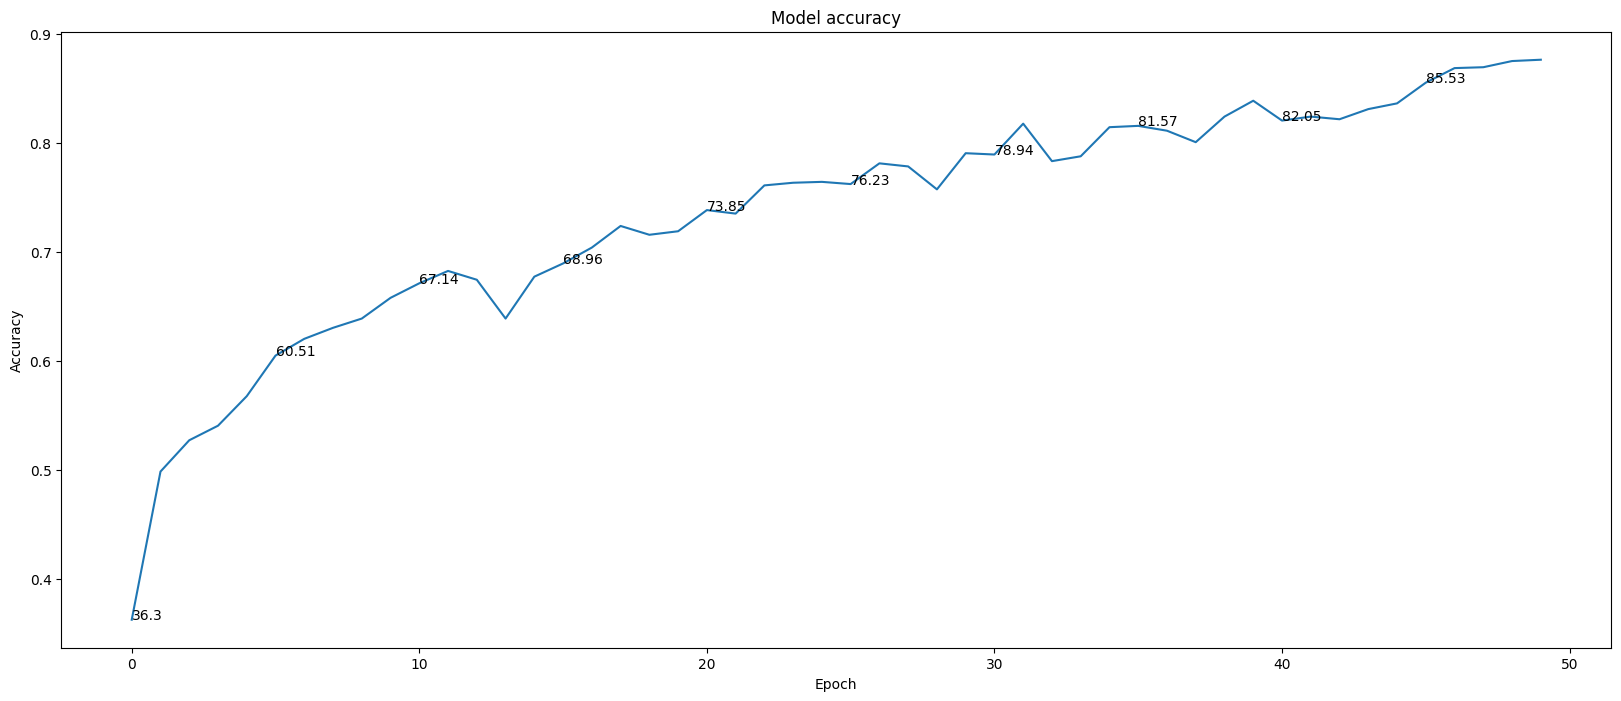

In [10]:
import matplotlib.pyplot as plt
import numpy as np
852
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

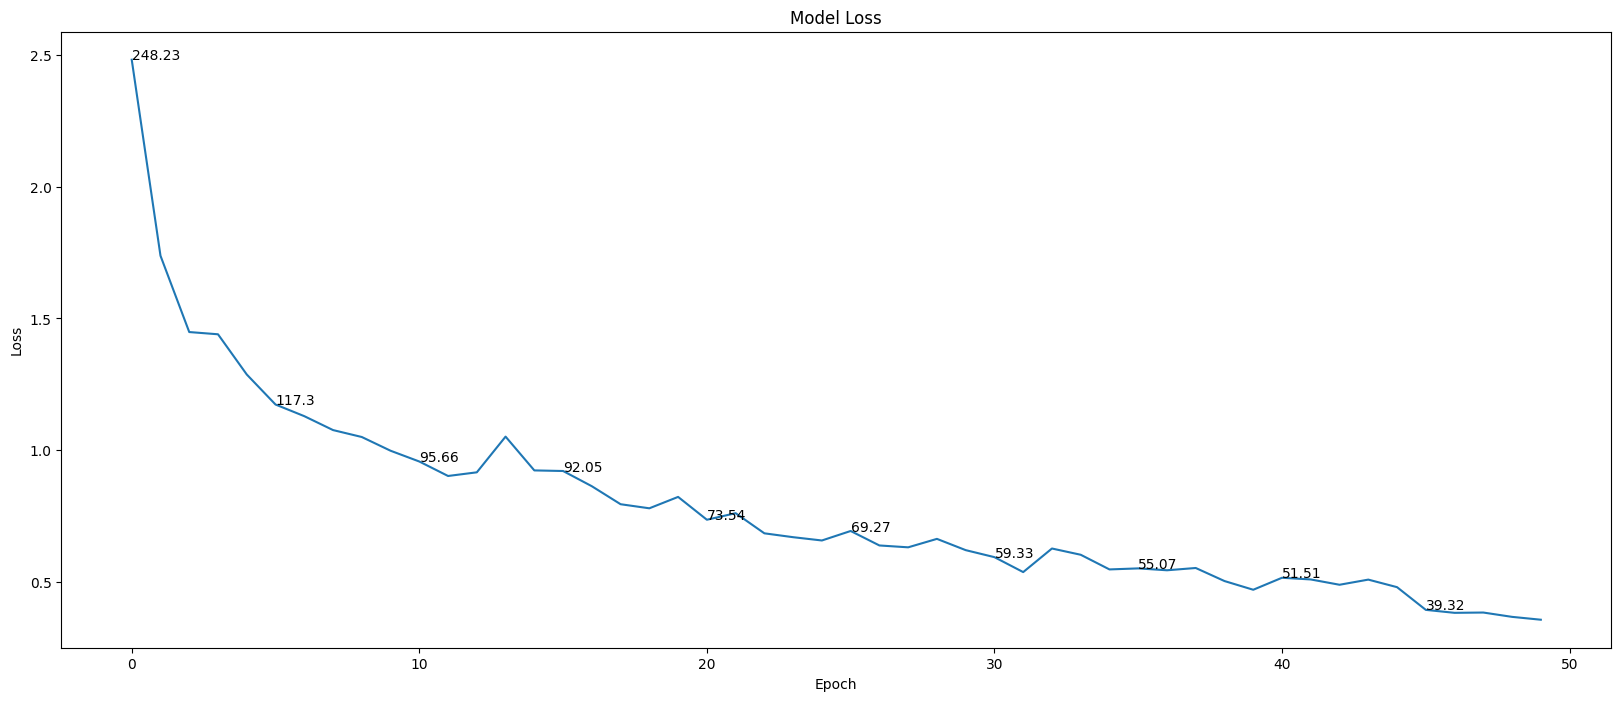

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()